<h1>Palmer Penguins Analysis</h1>

<h5>Overview</h5>
This notebook contains a basic data analysis of the popular Palmer Penguins dataset. The dataset contains measurements of penguins of three species: Adélie, Chinstrap, and Gentoo. 

The dataset includes the following:
   
species: The species of penguin (Adélie, Chinstrap, or Gentoo).    
island: The island where the penguin was observed (Biscoe, Dream, or Torgersen).    
bill_length_mm: The length of the penguin's bill in millimeters.\
bill_depth_mm: The depth of the penguin's bill in millimeters.\
flipper_length_mm: The length of the penguin's flipper in millimeters.\
body_mass_g: The body mass of the penguin in grams.
sex: The sex of the penguin (male, female, or NaN).

The datatype used to decribe the above dataset are as follows:

The **String** datatype is most appropriate in this case for the variables **species, island, and sex**. This is due to these varibales containing only categorical data.\
The **Float** datatype is most appropriate in this case for the variables **bill_length_mm, bill_depth_mm, flipper_length_mm, and body_mass_g**. The primary reason for this choice is that even though flipper_length_mm and body_mass_g don't utilise decimal measurement it is more consistent to use Float for all of the above numerical values instead of mixing int and float. The other main reason for this choice is that once basic statistical analysis (mean & std for example) is applied to a large whole number dataset the result is likely more accurately descibed using a float. This can be seen below in the statistical overview (df.describe()).

In [142]:
# Pandas and pyplot import - pd designated as variable for future use.
import pandas as pd
import matplotlib.pyplot as plt

In [143]:
# Loading the penguins dataset directly from the source github repository and assigning to variable df, shorthand for dataframe.
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

In [144]:
# Looking at dataset to ensure consistency.
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [145]:
# Describe the data set. See below a statistical overview of dataset numerical variables.
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [146]:
# First row displayed using iloc modifier. Testing of data.
df.iloc[0]

species                 Adelie
island               Torgersen
bill_length_mm            39.1
bill_depth_mm             18.7
flipper_length_mm        181.0
body_mass_g             3750.0
sex                       MALE
Name: 0, dtype: object

In [147]:
# Count the number of penguins of each sex. Testing of data.
df['sex'].value_counts()

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

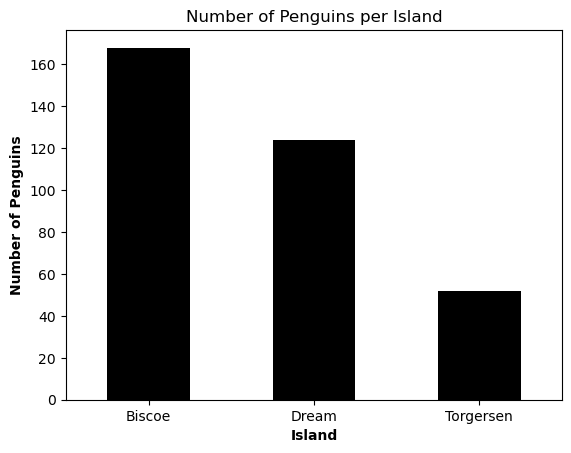

In [148]:
# Bar Chart showing number of penguins per island using pyplot

# Using pandas groupby method to group the data by island and count the number of penguins on each one.
penguins_per_island = df.groupby('island').size()

penguins_per_island.plot(kind='bar', color='black')

# Using matplotlib to add title and label axes.
plt.title('Number of Penguins per Island')
plt.xlabel('Island', fontweight='bold')
plt.xticks(rotation=0)
plt.ylabel('Number of Penguins', fontweight='bold')

# Showing the plot using matplotlib
plt.show()

***

### End